In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree , datasets
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report , accuracy_score
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded= files.upload()

Saving Company_Data.csv to Company_Data.csv


In [3]:
company = pd.read_csv("Company_Data.csv")
company.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No

In [4]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
company.describe()

Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education  
count  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000  
std     23.676664   16.200297    2.620528  
min     24.000000   25.000000   10.000000  
25%    100.000000   39.750000   12.000000  
50%    117.000000   54.500000   14.000000  
75%    131.000000   66.000000   16.000000  
max    191.000000   80.000000   18.000000

In [6]:
company.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [7]:
company[company.duplicated()].sum()

Sales          0.0
CompPrice        0
Income           0
Advertising      0
Population       0
Price            0
ShelveLoc        0
Age              0
Education        0
Urban            0
US               0
dtype: object

**Label Encoding**

In [9]:
label_encoder= preprocessing.LabelEncoder()
company['ShelveLoc']= label_encoder.fit_transform(company['ShelveLoc'])
company['Urban']= label_encoder.fit_transform(company['Urban'])
company['US']= label_encoder.fit_transform(company['US'])

In [10]:
company['ShelveLoc']= company['ShelveLoc'].astype('category')
company['Urban']= company['Urban'].astype('category')
company['US']= company['US'].astype('category')

In [11]:
company.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120         0   42   
1  11.22        111      48           16         260     83         1   65   
2  10.06        113      35           10         269     80         2   59   
3   7.40        117     100            4         466     97         2   55   
4   4.15        141      64            3         340    128         0   38   

   Education Urban US  
0         17     1  1  
1         10     1  1  
2         12     1  1  
3         14     1  1  
4         13     1  0

In [12]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        400 non-null    float64 
 1   CompPrice    400 non-null    int64   
 2   Income       400 non-null    int64   
 3   Advertising  400 non-null    int64   
 4   Population   400 non-null    int64   
 5   Price        400 non-null    int64   
 6   ShelveLoc    400 non-null    category
 7   Age          400 non-null    int64   
 8   Education    400 non-null    int64   
 9   Urban        400 non-null    category
 10  US           400 non-null    category
dtypes: category(3), float64(1), int64(7)
memory usage: 26.7 KB


In [13]:
company.Sales.max()/3

5.423333333333333

In [14]:
company1= company.copy()
company1['Sales_cat']=pd.cut(company['Sales'],bins=3,labels=['Low','Medium','High'])
company1= company1.drop(columns=['Sales'])

In [15]:
company1.head()

CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0        138      73           11         276    120         0   42   
1        111      48           16         260     83         1   65   
2        113      35           10         269     80         2   59   
3        117     100            4         466     97         2   55   
4        141      64            3         340    128         0   38   

   Education Urban US Sales_cat  
0         17     1  1    Medium  
1         10     1  1      High  
2         12     1  1    Medium  
3         14     1  1    Medium  
4         13     1  0       Low

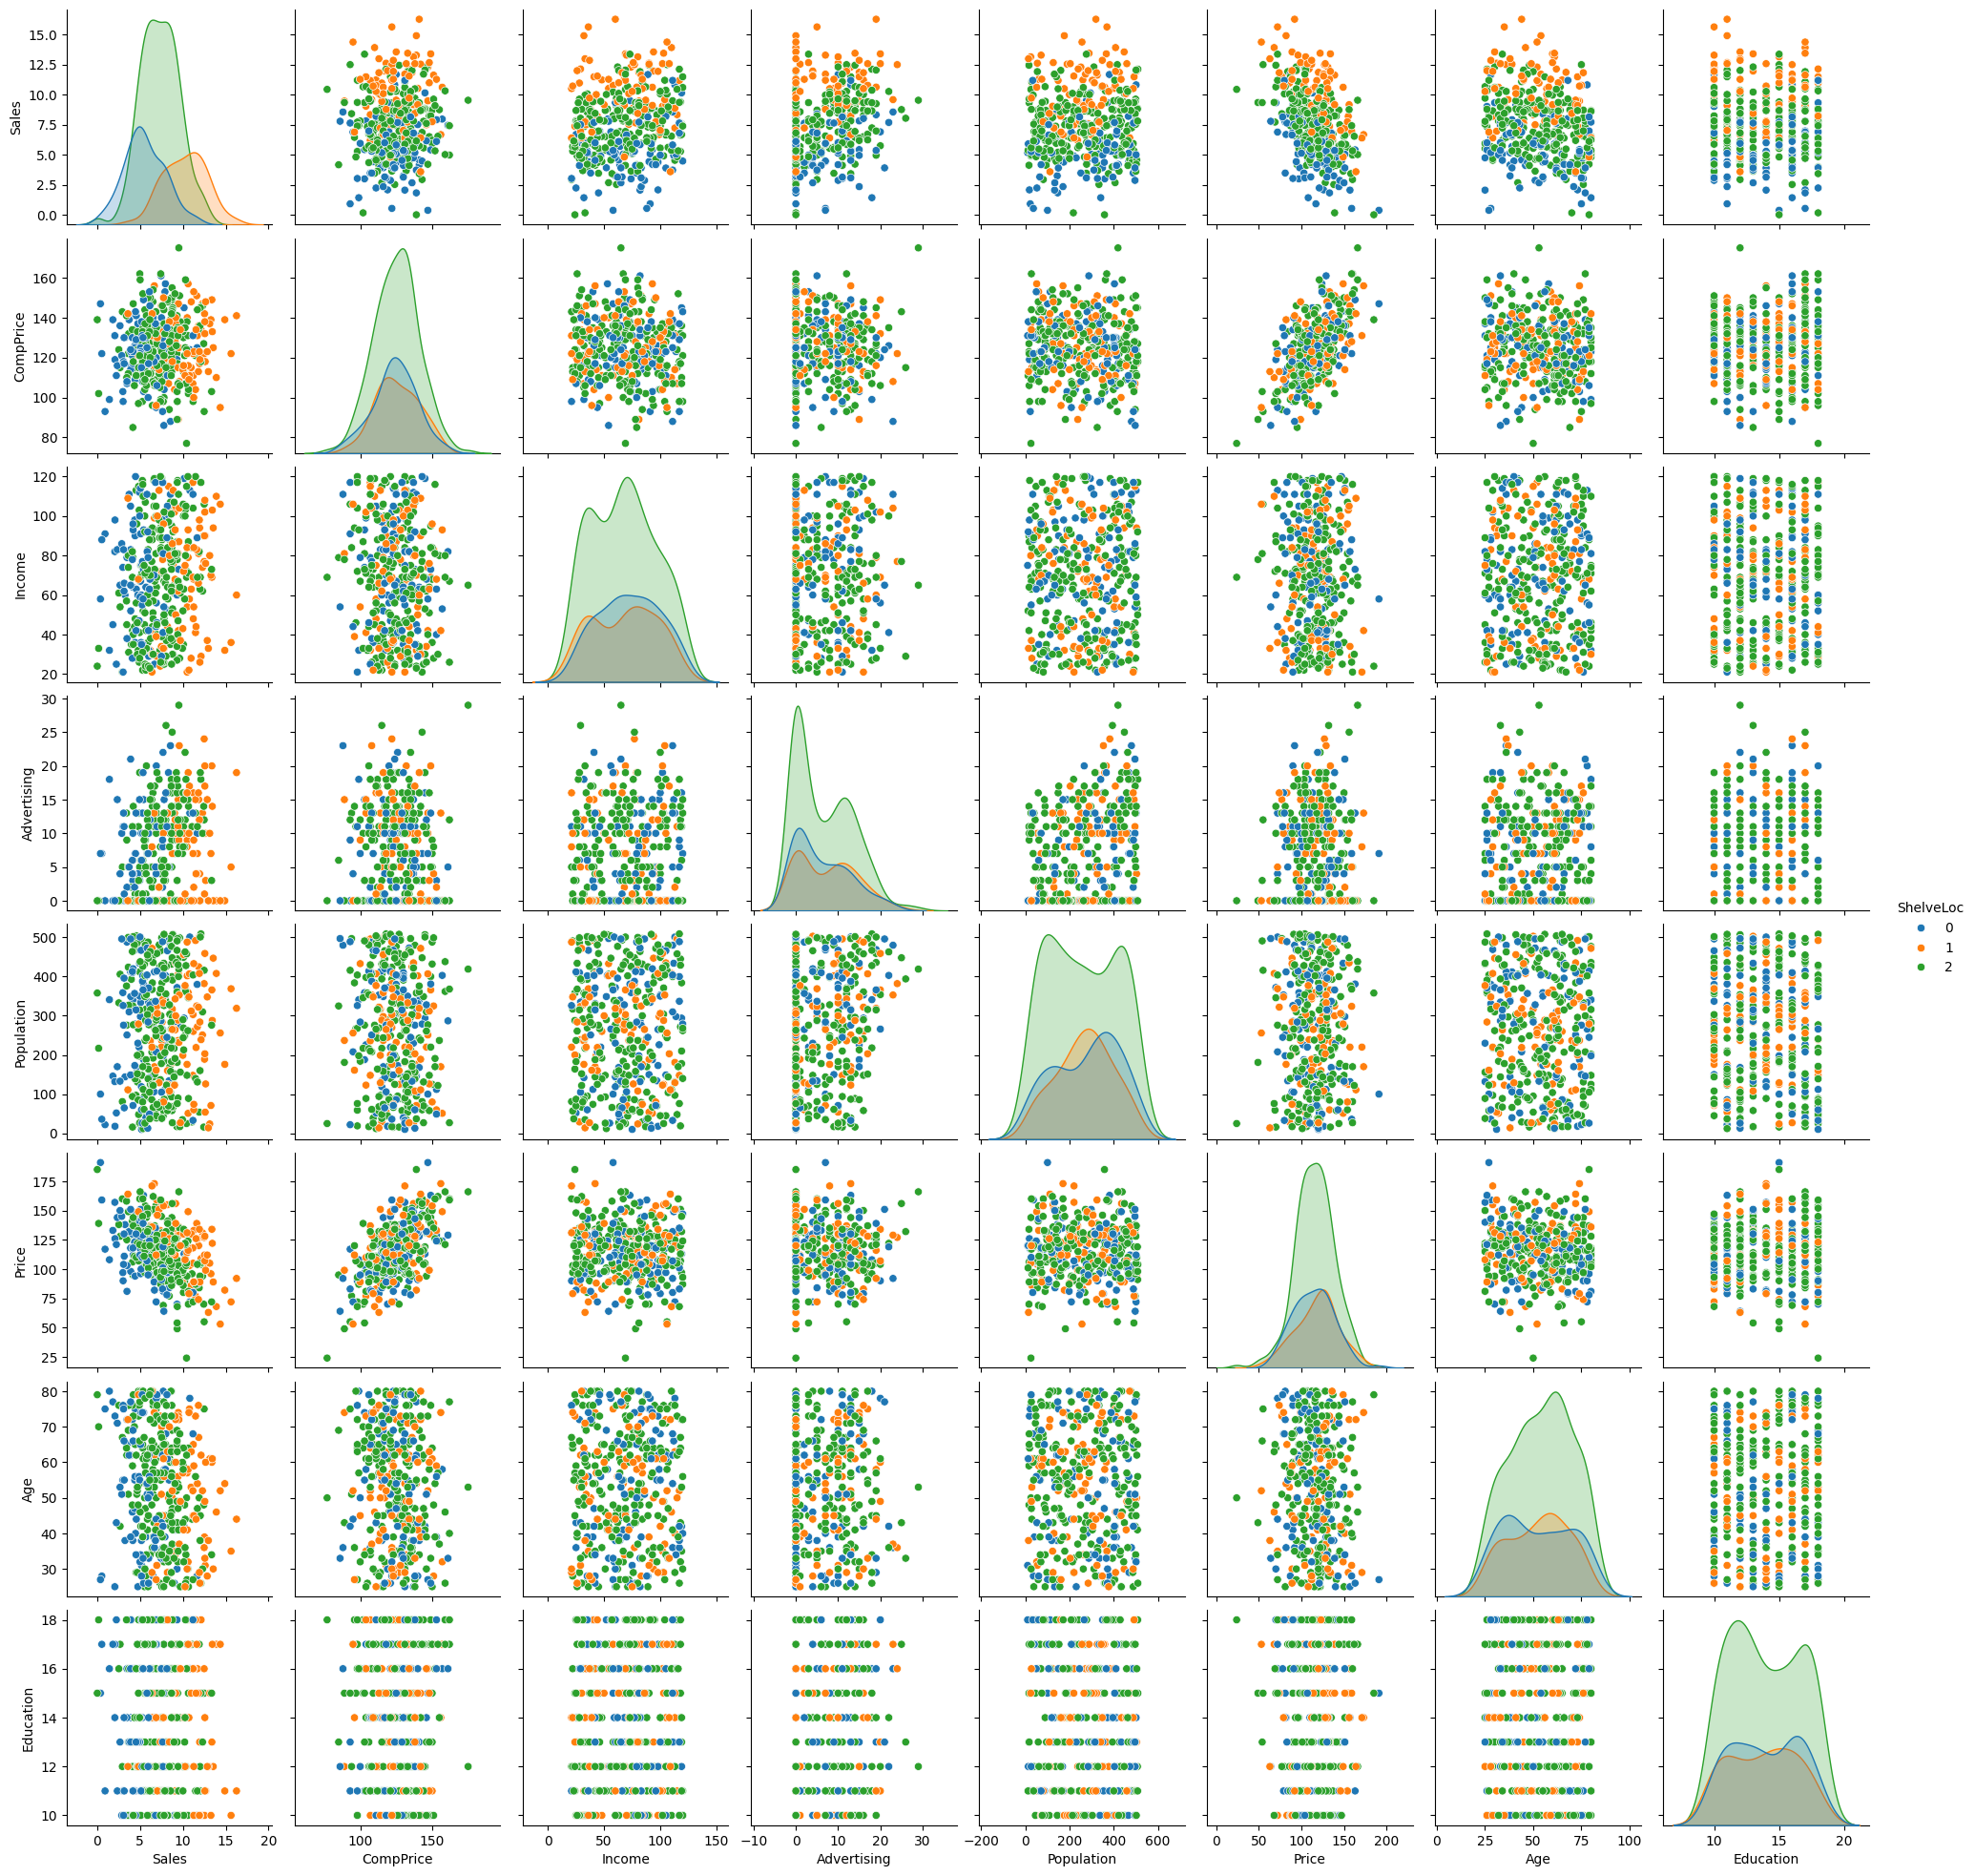

In [49]:
sns.pairplot(data=company, hue = 'ShelveLoc')

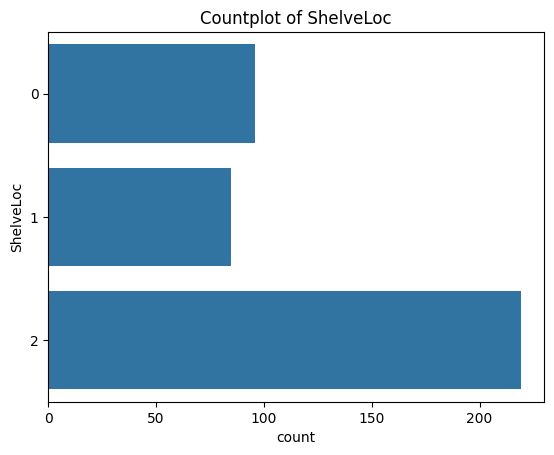

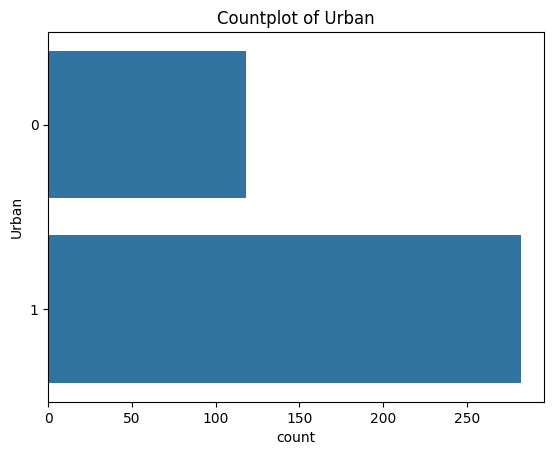

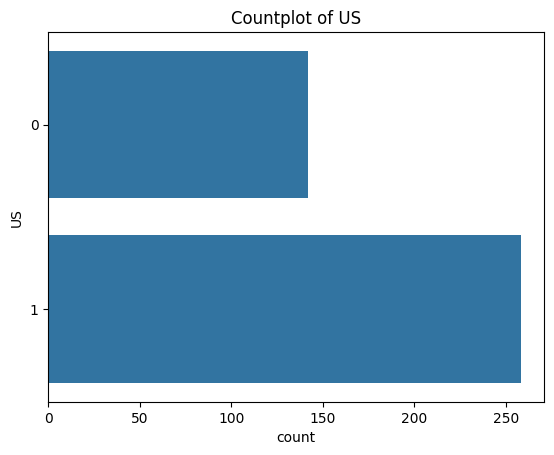

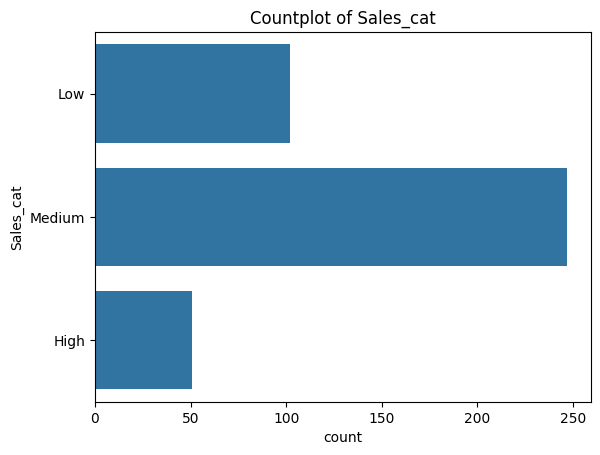

In [16]:
columns= ['ShelveLoc','Urban','US','Sales_cat']
for column in columns:
    sns.countplot(company1[column])
    plt.title(f'Countplot of {column}')
    plt.show()

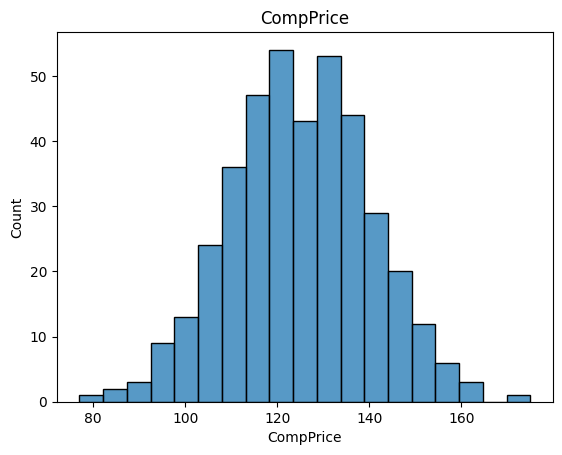

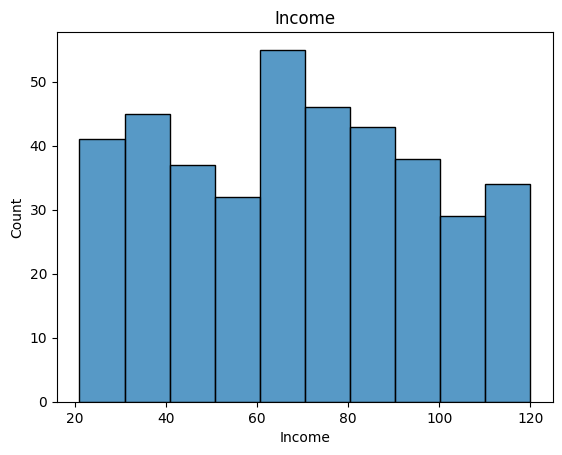

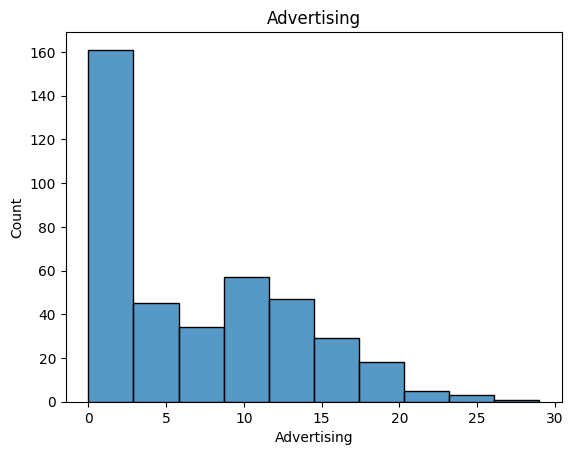

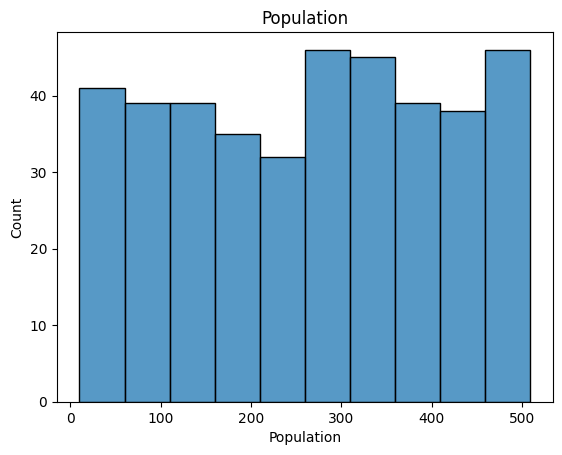

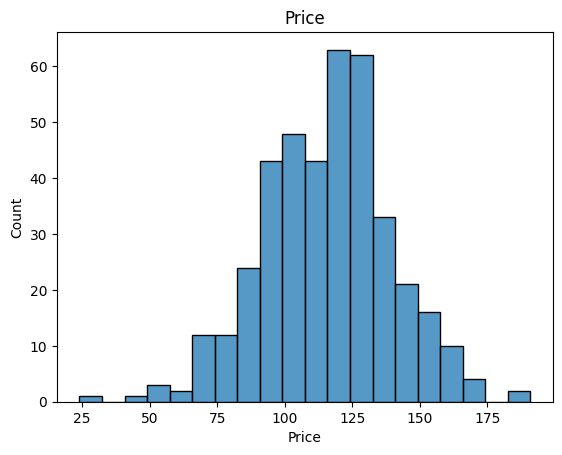

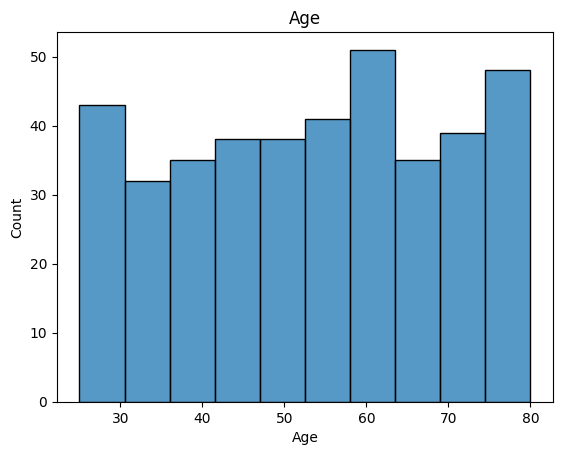

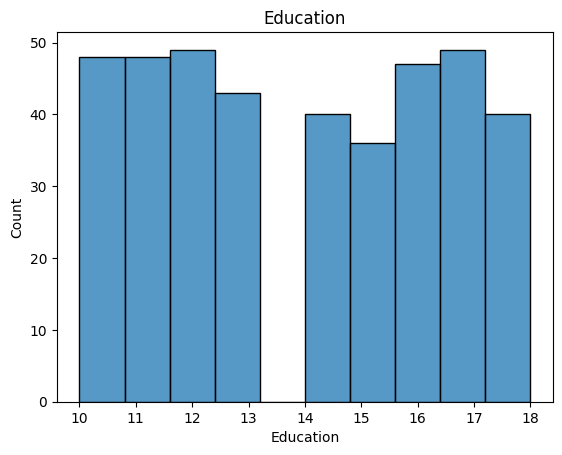

In [17]:
colnames=['CompPrice','Income','Advertising','Population','Price', "Age","Education"]
for colname in colnames:
  sns.histplot(company1[colname])
  plt.title(f'{colname}')
  plt.show()

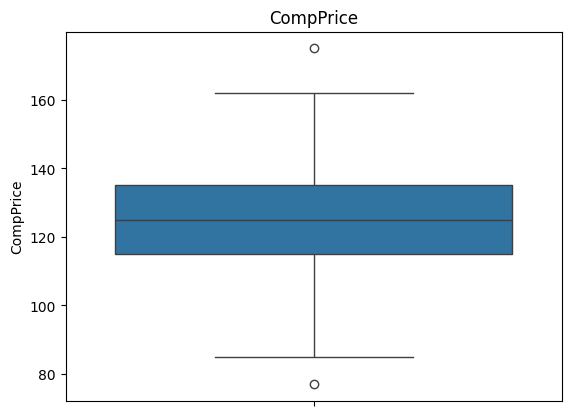

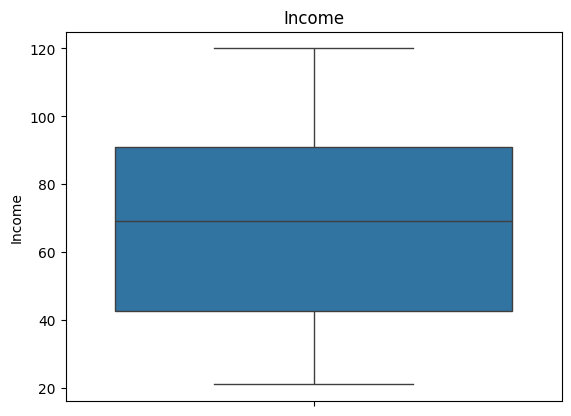

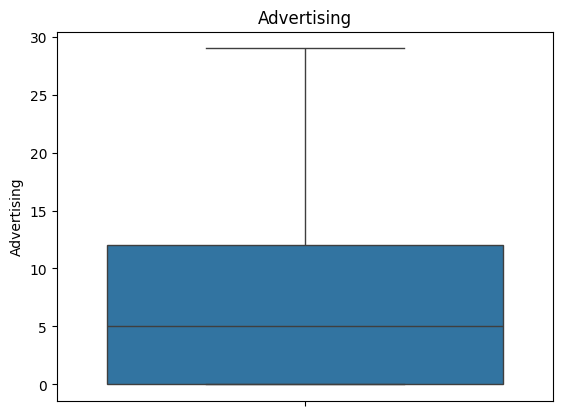

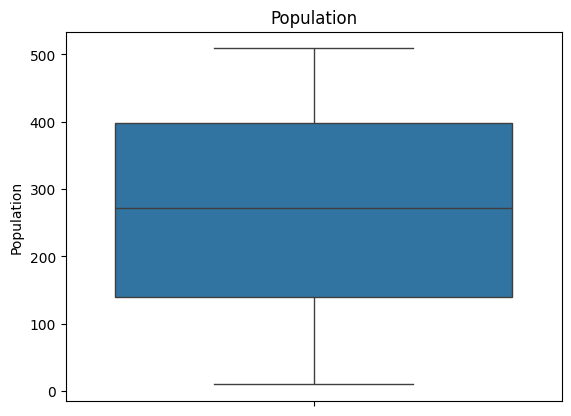

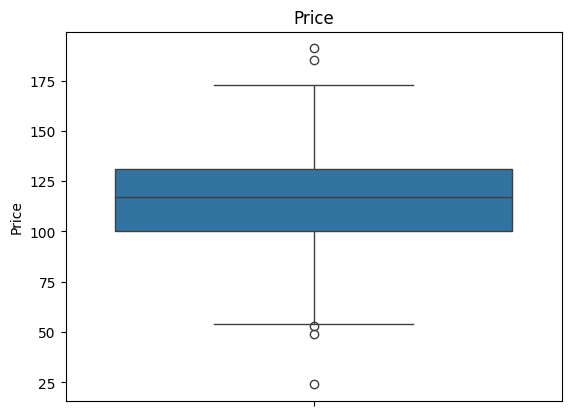

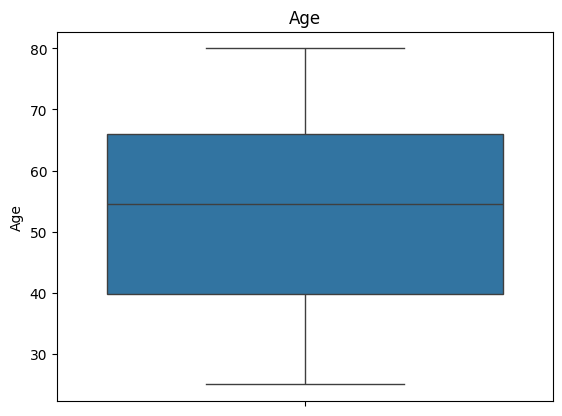

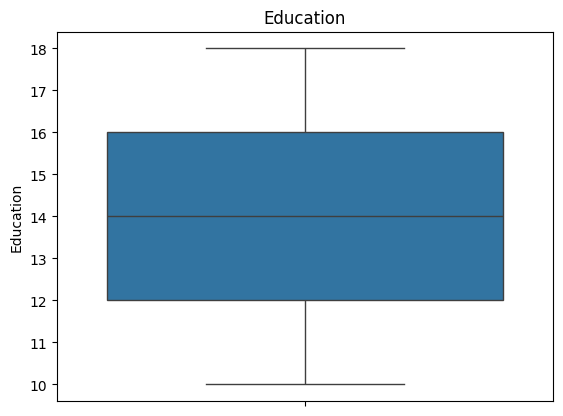

In [18]:
colnames=['CompPrice','Income','Advertising','Population','Price', "Age","Education"]
for colname in colnames:
  sns.boxplot(company1[colname])
  plt.title(f'{colname}')
  plt.show()

In [19]:
company2 = company1.copy()

for feature in colnames:
    Q1, Q3 = np.percentile(company1[feature], [25, 75])  # Calculate quartiles for the current feature
    IQR = Q3 - Q1
    UL = Q3 + 1.5 * IQR  # Upper limit for outlier detection
    LL = Q1 - 1.5 * IQR  # Lower limit for outlier detection

    outliers = company1[feature][(company1[feature] < LL) | (company1[feature] > UL)]  # Detect outliers for the current feature
    company2 = company2.drop(outliers.index, errors="ignore")  # Remove outliers from company2

    outliers = 0  # Reset outliers variable

In [20]:
company2.shape

(394, 11)

In [21]:
y= company2["Sales_cat"]
x= company2.drop(['Sales_cat'],axis=1)

In [22]:
x= pd.get_dummies(x)

In [23]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [24]:
y= le.fit_transform(y)

In [25]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2, random_state=42)

In [26]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(315, 14)
(79, 14)
(315,)
(79,)


In [27]:
x_train

CompPrice  Income  Advertising  Population  Price  Age  Education  \
334         93     117            9         489     83   42         13   
186        120      51            0          93     86   46         17   
176        138     107            9         480    154   47         11   
64         100      67           12         184    104   32         16   
347         96      39            0         161    112   27         14   
..         ...     ...          ...         ...    ...  ...        ...   
72         115      45            0         432    116   25         15   
107        134     107            0         104    108   60         12   
274        135      93            2          67    119   34         11   
353        107      67           12         430     92   35         12   
103        123      91            0         334     96   78         17   

     ShelveLoc_0  ShelveLoc_1  ShelveLoc_2  Urban_0  Urban_1   US_0   US_1  
334         True        False        False    False     True  False   True  
186        False        False         True     True    False   True  False  
176        False        False         True     True    False  False   True  
64         False        False         True     True    False  False   True  
347        False         True        False     True    False   True  False  
..           ...          ...          ...      ...      ...    ...    ...  
72         False        False         True    False     True   True  False  
107        False        False         True    False     True   True  False  
274        False        False         True    False     True  False   True  
353        False        False         True     True    False  False   True  
103         True        False        False    False     True  False   True  

[315 rows x 14 columns]

**Feature Selection**

In [28]:
from sklearn.feature_selection import SelectKBest, chi2

In [29]:
test= SelectKBest(score_func=chi2,k=4)
fit = test.fit(x,y)

In [30]:
scores= fit.scores_
features= fit.transform(x)

In [31]:
score_df = pd.DataFrame(list(zip(scores, x.columns)),
               columns =['Score', 'Feature'])
score_df.sort_values(by="Score", ascending=False, inplace=True)
score_df

Score      Feature
4   209.373837        Price
2   136.173415  Advertising
5    93.046138          Age
8    78.441187  ShelveLoc_1
7    49.027227  ShelveLoc_0
1    42.670507       Income
3    24.937094   Population
9    14.878797  ShelveLoc_2
12    7.003514         US_0
0     4.791049    CompPrice
13    3.775332         US_1
6     0.418052    Education
10    0.272875      Urban_0
11    0.113861      Urban_1

In [32]:
model_x=  x[['CompPrice','Income','Advertising','Population','Price','Age','ShelveLoc_0','ShelveLoc_1'	,'ShelveLoc_2','US_0']]
model_x

CompPrice  Income  Advertising  Population  Price  Age  ShelveLoc_0  \
0          138      73           11         276    120   42         True   
1          111      48           16         260     83   65        False   
2          113      35           10         269     80   59        False   
3          117     100            4         466     97   55        False   
4          141      64            3         340    128   38         True   
..         ...     ...          ...         ...    ...  ...          ...   
395        138     108           17         203    128   33        False   
396        139      23            3          37    120   55        False   
397        162      26           12         368    159   40        False   
398        100      79            7         284     95   50         True   
399        134      37            0          27    120   49        False   

     ShelveLoc_1  ShelveLoc_2   US_0  
0          False        False  False  
1           True        False  False  
2          False         True  False  
3          False         True  False  
4          False        False   True  
..           ...          ...    ...  
395         True        False  False  
396        False         True  False  
397        False         True  False  
398        False        False  False  
399         True        False  False  

[394 rows x 10 columns]

In [33]:
x_train,x_test,y_train,y_test= train_test_split(model_x,y,test_size=0.2, random_state=42)

# **Decision Tree Classifer**
a)Entropy Method

In [34]:
model= DecisionTreeClassifier(criterion= 'entropy', max_depth= 4)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [35]:
pred= model.predict(x_test)
pred

array([2, 2, 1, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2,
       0, 1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 1,
       2, 2, 1, 2, 2, 2, 1, 1, 0, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0])

In [36]:
np.mean(pred==y_test)     ###Acuracy

0.7215189873417721

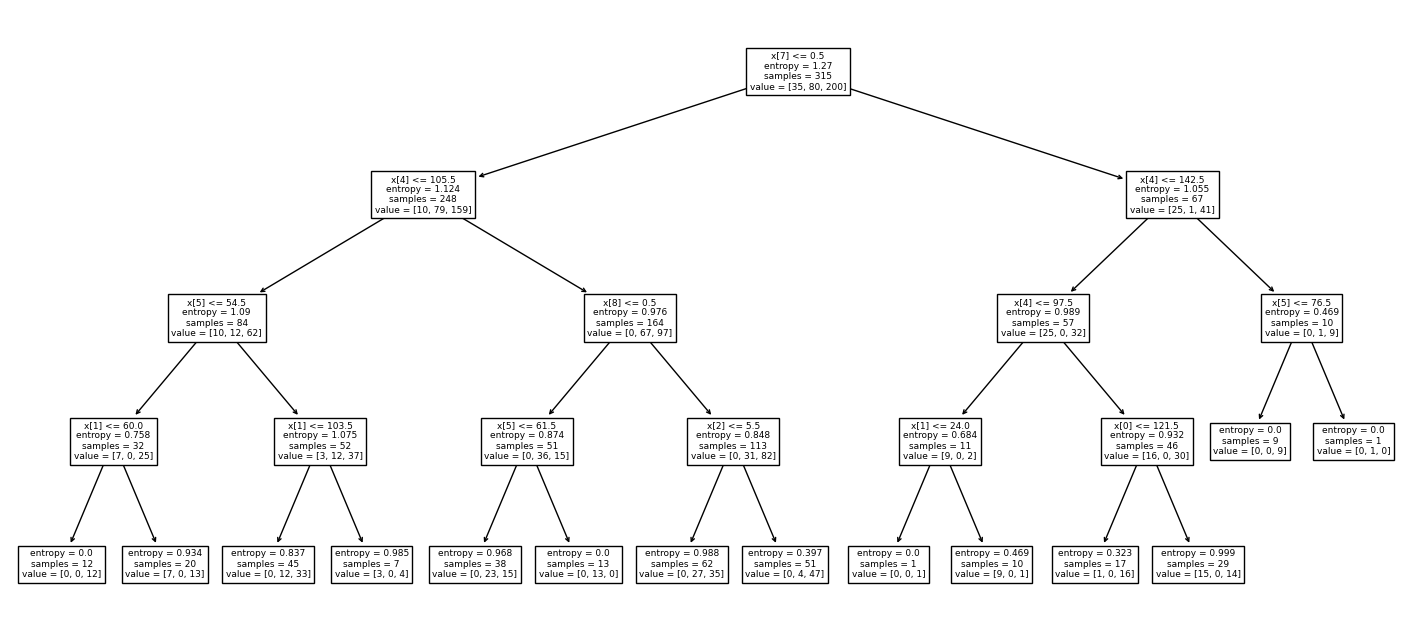

In [37]:
plt.figure(figsize=(18,8))
tree.plot_tree(model)
plt.show()

b)Using Gini Criteria

In [38]:
model2= DecisionTreeClassifier(criterion='gini',max_depth=4)

In [39]:
model2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [40]:
pred2= model2.predict(x_test)
np.mean(pred2==y_test)

0.7088607594936709

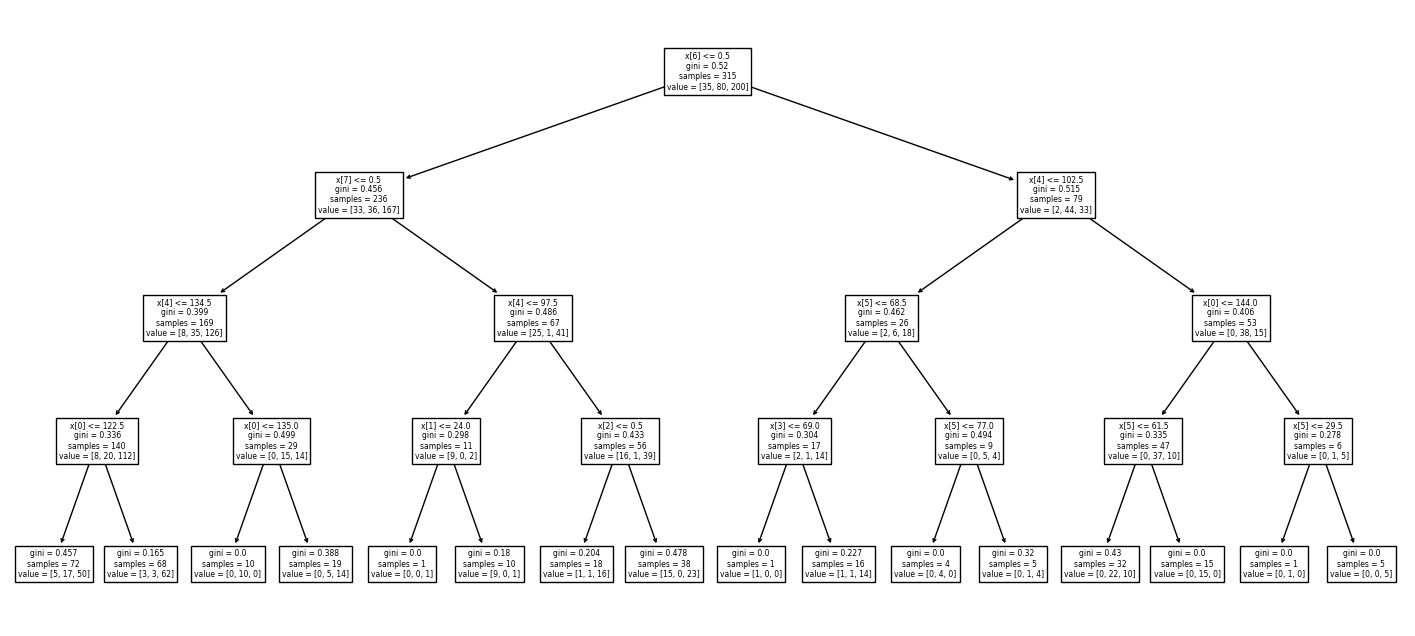

In [41]:
plt.figure(figsize=(18,8))
tree.plot_tree(model2)
plt.show()

c) HyperParamter Tuning

In [42]:
num_folds=10
kfold= KFold(n_splits=10,shuffle=True)

In [43]:
param= {"criterion":['gini',"entropy"], 'max_depth':range(1,10),"min_samples_split":range(1,10),"min_samples_leaf":range(1,10)}

In [44]:
DT= DecisionTreeClassifier()
grid= GridSearchCV(DT,param_grid=param,cv=kfold)
grid.fit(model_x,y)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(1, 10)})

In [45]:
print(grid.best_score_)
print(grid.best_params_)

0.7028846153846154
{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 9}


# **Building final model**

In [46]:
final_model= grid.best_estimator_
final_model.fit(model_x,y)
result= cross_val_score(final_model,model_x,y,cv=kfold)
print('Accuracy',np.round(result.mean(),3))

Accuracy 0.662


In [47]:
model_train = grid.best_estimator_
pred_train=model_train.predict(x_test)
print('Accuracy:', accuracy_score(y_test, pred_train))

Accuracy: 0.8481012658227848


In [48]:
fn=['CompPrice','Income','Advertising','Population','Price','Age','ShelveLoc_0','ShelveLoc_1'	,'ShelveLoc_2','US_0']
cn=['High', 'Medium', 'Low']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,6), dpi=1200)
tree.plot_tree(final_model,
               feature_names = fn,
               class_names=cn,
               filled = True);
plt.savefig('tree.png',format='png',bbox_inches = "tight")

In [50]:
preds = model.predict(x_test) # predicting on test data set
pd.Series(preds).value_counts()

2    58
0    12
1     9
Name: count, dtype: int64

In [51]:
np.mean(preds==y_test)

0.7215189873417721

**Building Decision Tree Classifier (CART) using Gini Criteria**

In [52]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)
model_gini.fit(x_train, y_train)

#Prediction and computing the accuracy
pred=model.predict(x_test)
np.mean(preds==y_test)

0.7215189873417721

**Decision Tree Regression**

In [53]:
array = company.values
X = array[:,0:3]
y = array[:,3]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
model1 = DecisionTreeRegressor()
model1.fit(X_train, y_train)
# Checking the accuracy
model1.score(X_test,y_test)

-1.3007579693755926